# `matplotlib` and `numpy` - Simple arrays and plotting in Python
<font size="1" color=lightgray>Portions of the matplotlib instructions in this notebook are modified from the open-source Scientific Python Lectures (<a href="https://github.com/jrjohansson/scientific-python-lectures" style="color:lightgray">https://github.com/jrjohansson/scientific-python-lectures</a>) by J. R. Johansson under the <a href="https://creativecommons.org/licenses/by/3.0/" style="color:lightgray">CC BY 3.0 license</a>.</font>

Last week we saw how to do basic calculations using functions in a Python notebook. This week, we will introduce two importable packages that allow us to do more complex mathematical calculations and then visually inspect our results by making plots. These two packages, `matplotlib` and `numpy`, are so prevalent that they are imported into nearly every scientific script that people write. I personally don't even ever begin to attempt data analysis without them.

***HEY YOU! PAY ATTENTION! There are several exercises for you to complete within this notebook. Don't miss 'em.***

### A simple example

Our first step is to import these packages. Let's start with `numpy`. `numpy` let's us make flexible arrays of numbers, which in this tutorial we will use to make plots. Arrays are kind of like lists of numbers, but they can have multiple dimensions and you can do mathematical operations on the whole array at once. `numpy` can also do all sorts of other things which are documented at its website: http://www.numpy.org/. Usually, people `import numpy as np` to save on typing when they write their code, so let's do that:

In [1]:
import numpy as np

Now we can use `numpy`. Suppose we want to plot the function $x^2$ from $x=0$ to $x=5$. Mathematically, this seems simple: just draw the part of the parabola over the infinite number of points from $x=0$ to $x=5$. But computers can't work in infinities; they break everything up into discrete, separate points. We need to think a little differently to use a computer to make such a plot. We need to make an array of $x$ values, evaluate them with $x^2$ to get the $y$ values, and then put all of those points on the screen.

Let's use `numpy` to make an array of $x$ values. For now, let's make 3 values linearly spaced from 0 to 5. We can do this with `numpy`'s `linspace` method like so:

In [2]:
x = np.linspace(0, 5, 3)

Now we have an array of values stored in the variable $x$. We could print it out to check:

In [3]:
print(x)

[ 0.   2.5  5. ]


Great! Now we have some $x$ values. Let's calculate the $y$ values. Because we created $x$ using `numpy` to make an array, we can just operate on the whole array at once, like so:

In [4]:
y = x ** 2
print(y)

[  0.     6.25  25.  ]


Now we have three points (each with an x and y value). Let's see how to plot them. The package for plotting in Python is `matplotlib` -- more specifically, it is the `pyplot` module within `matplotlib` that actually makes the plots. We want to import that module. However, first, if we want the plots to appear within this notebook rather than in a new window or saved to a file, we have to tell the notebook to do so.

In [5]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. 
# If you ever use Python outside of notebooks, you do not need this.
%matplotlib inline

And now we can import `pyplot` itself, which most people abbreviate in a way similar to what we did with `numpy`, like so:

In [6]:
import matplotlib.pyplot as plt

Note that most people simply put all of their imports at the top of their Python documents (which is a good habit); I have explained them one by one just for the sake of clarity.

`pyplot` is incredibly flexible and powerful. It can simply make a plot based on the arrays you give it, and then you can use other methods from `pyplot` to modify the appearance of the plot. Let's do so now, using our $x$ and $y$ data from above:

Text(0.5,1,'Here is a title for my plot')

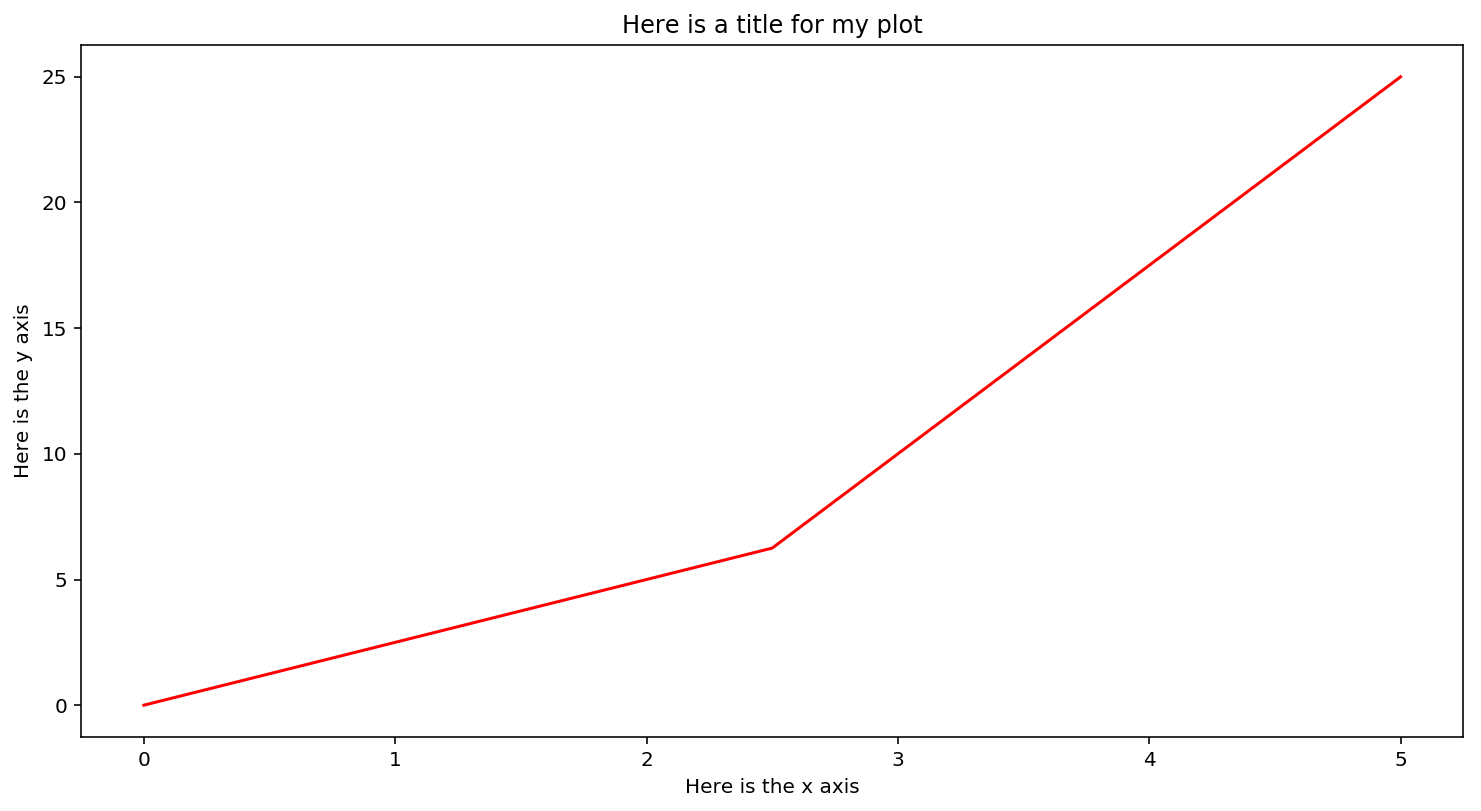

In [7]:
fig = plt.figure(figsize=(12,6)) #Here we call pyplot and tell it to create a figure object of a certain size in the variable fig

#The figure will have axes, which we make from the figure we created and store in the variable axes
#The list of numbers specifies where the lower left point of the axes is and then how far on the figure they extend
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height

#Now we can use the plot method on our axes to add our data to the plot
axes.plot(x, y, 'r') #x data, y data, red color

axes.set_xlabel('Here is the x axis') # Good plots are labeled!
axes.set_ylabel('Here is the y axis') # Good plots are labeled!
axes.set_title('Here is a title for my plot')

Well, that's sorta good. We managed to make a plot, but that doesn't look much like a parabola. Why? Remember, we're plotting points (which by default have lines drawn between them), not a truly continuous function. If we want it to look more like that function, we need to use enough points that it is well-approximated. Let's re-make our plot with better sampling (100 points this time):

Text(0.5,1,'A better parabola')

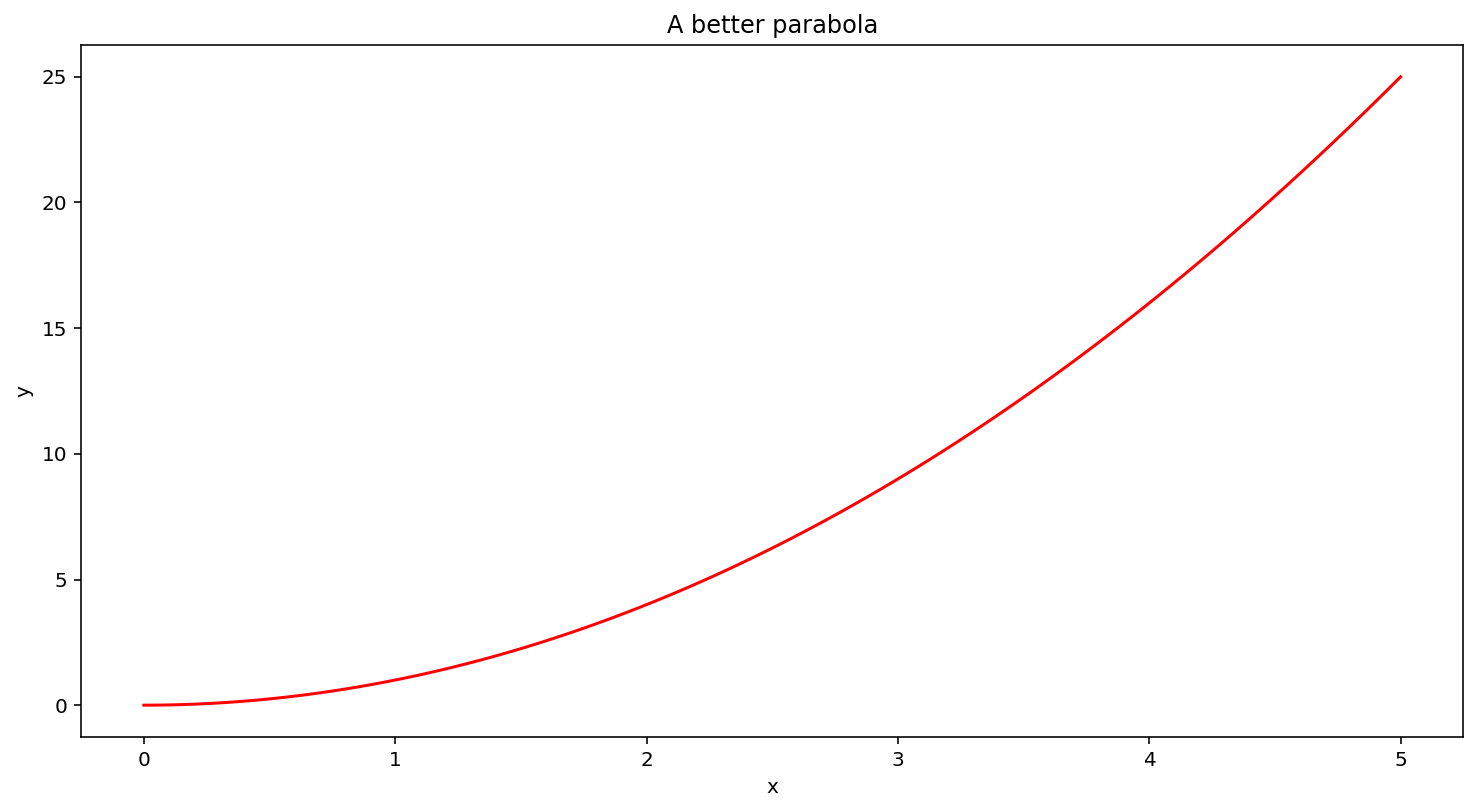

In [8]:
x = np.linspace(0, 5, 100) # a numpy array of 100 linearly spaced x points from 0 to 5
y = x ** 2 # a numpy array of y values calculated using x

fig = plt.figure(figsize=(12,6)) # Make figure object

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # Place axes

# Modify axes by adding data
axes.plot(x, y, 'r') #x data, y data, red color

# Modify axes' appearance
axes.set_xlabel('x') 
axes.set_ylabel('y') 
axes.set_title('A better parabola')

#### ***An exercise for you:*** Please alter the above plot of the parabola (you can do so right in the above cell). Change the color of the curve to brown, make the whole figure square in shape, alter the title to indicate that it is *your* parabola, and make the plot show data up to $x=10$. (Hint: I have not explicitly told you how to make the curve brown. As with most programming problems, you should google until you know how to do it. There are at least eight ways to specify colors here, including one based on a webcomic.)

It is hard to overstate how much you can do with the `numpy` and `matplotlib` combination. For example, `matplotlib`:
* Has support for $\LaTeX$-formatted labels and texts
* Allows great control of every element in a figure, including figure size, subplots, legends, line styles, color bars, DPI, and thousands of other features. 
* Produces high-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF (as well as inline figures like we are using!).
* Can open a GUI for interactively exploring figures and can be automated for batch jobs
* Can make animated plots, which can be saved as video files
* Can do a million other things

One of the key features of `matplotlib` that makes it highly suitable for generating figures for scientific analysis and publication is that all aspects of the figure can be controlled *programmatically*. Figures can always be created on the fly as you do analysis and they are easily updated when you change your analysis. This is important for reproducibility and convenient when one needs to regenerate a figure with updated data or change its appearance. 

I can't begin to cover everything this package can do. If you ever need to alter a plot you made in some new way, google around the internet for help, or find out about the package's features at the Matplotlib web page: http://matplotlib.org/

### A more complicated example

Let's just complicate our plot slightly; instead of plotting $x^2$, let's find out how functions look different when the $x$ values are raised to different powers. Let's also set our aesthetic standards a bit higher: our plot should have a clearly labeled legend with properly formatted mathematical notation.

Adding a legend is pretty straightforward. All we have to do is use the `legend` method on our axes. It might look something like this:

Text(0,0.5,'y')

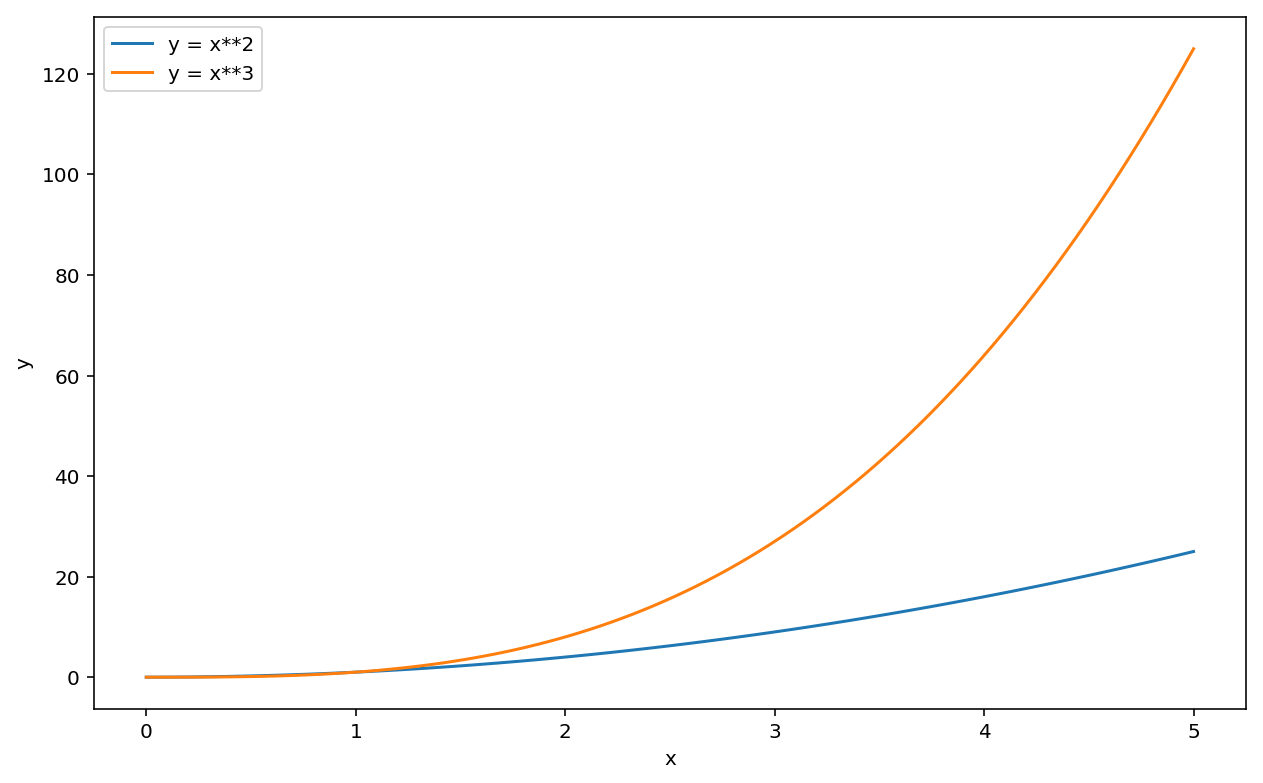

In [9]:
x = np.linspace(0, 5, 100) # a numpy array of 100 linearly spaced x points from 0 to 5

fig = plt.figure(figsize=(10,6)) # Make figure object

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # Place axes

axes.plot(x, x**2, label="y = x**2") # When I add the data, also give it a label to use in the legend
axes.plot(x, x**3, label="y = x**3")
axes.legend(loc=2); # Make legend in upper left corner. Location codes listed at http://matplotlib.org/users/legend_guide.html#legend-location
axes.set_xlabel('x')
axes.set_ylabel('y')

That's pretty good by it has some problems. One is that our legend is ugly and hard to read; we want real mathematical notation. Luckily, LaTeX markup is supported. Second, the font sizes are too hard to read. 

To fix the equations, all we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, `"$y=x^3$"`. But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our LaTeX code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`.

The font size issue is simpler. We just add a `fontsize` keyword. Combining these two fixes, we get:

Text(0,0.5,'$y$')

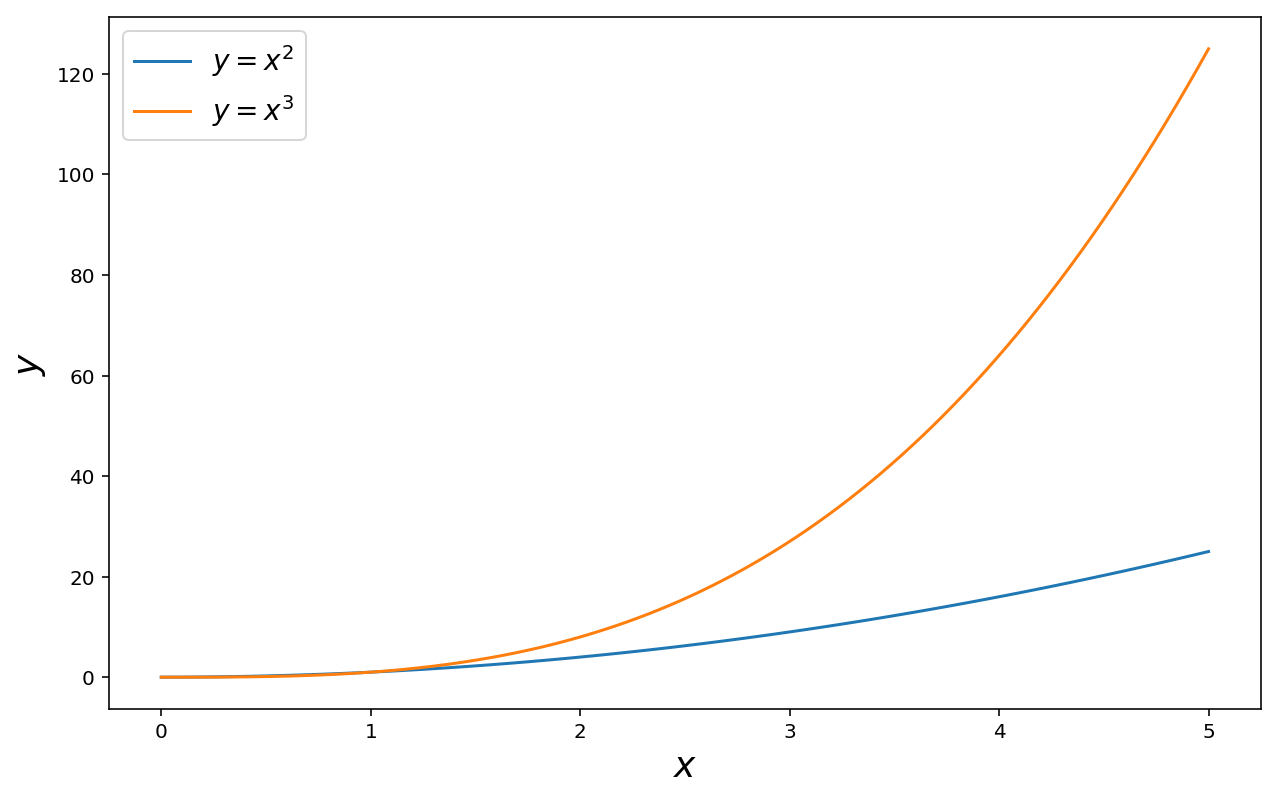

In [10]:
x = np.linspace(0, 5, 100) # a numpy array of 100 linearly spaced x points from 0 to 5

fig = plt.figure(figsize=(10,6)) # Make figure object

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # Place axes

axes.plot(x, x**2, label=r"$y = x^2$") # When I add the data, also give it a label to use in the legend
axes.plot(x, x**3, label=r"$y = x^3$")
axes.legend(loc=2,fontsize=14); # Make legend in upper left corner. Location codes listed at http://matplotlib.org/users/legend_guide.html#legend-location
axes.set_xlabel(r"$x$",fontsize=18)
axes.set_ylabel(r"$y$",fontsize=18)

Better. But there is a bigger problem in how we have approached this problem. Manually plotting two curves worked great, but suppose I wanted to plot the first 10 powers of $x$? Or 100? Or 1000? I could never manually type all of those commands, and it would be a nightmare to edit a plot with thousands of commands. A better way is to be clever about our programming - we want to make some code that solves the general problem of plotting $y=x^n$. Think of this as analogous to solving a physics problem algebraically, so you can plug in any numbers, rather than plugging in numbers at the start so you only can use your solution once.

To solve this problem, we need to introduce the concept of a loop. Loops are one of the most common ideas in programming. The basic idea is that instead of entering a command lots of times with slight variations, let the programming language loop over it a certain number of times while making slight changes each time on your behalf. For example, let's use the most common loop: a `for` loop. The idea is that `for` each thing in some list that you specify, Python runs some code for you. This is easier to understand with an example:

In [1]:
fruits = ["apple", "banana", "cherry"] # A list of fruit words
counter=0 #a counter to help understand loops

# Now we start a for loop. It must:
#    - use the for command to initiate it
#    - identify a variable that changes with each iteration (i in this case)
#    - identify a list-like variable to loop through (fruits in this case)
# Then we indent our code to indicate the code that is getting looped.
for i in fruits: # start a for loop
    counter=counter+1 # Add 1 to our counter, so we know we started a new loop
    print('I am a for loop. This is loop number {}.'.format(counter)) # Print some info
    print('My favorite fruit during this loop is {}.'.format(i)) # Use our loop variable


I am a for loop. This is loop number 1.
My favorite fruit during this loop is apple.
I am a for loop. This is loop number 2.
My favorite fruit during this loop is banana.
I am a for loop. This is loop number 3.
My favorite fruit during this loop is cherry.


A very useful function for loops is `range`. It makes a range of numbers that you can loop over. Suppose I want to square the integers from 0 to 5 and print the results. I could do this:

In [12]:
for i in range(0,6): # Loop i over the range 0 through 6.
    print(i**2)

0
1
4
9
16
25


Notice that my `range` command was `range(0,6)`, not `range(0,5)`. I need to do this because of how Python counts. I am telling it to give me 0 ***up to but not including*** 6.

`range` also can change the increment between values (for example, you can count by twos or threes instead of by ones), which is often very handy. Here's a quick example,

In [16]:
for i in range(0,10,3): # Loop i over the range 0 through 10 in increments of 3.
    print(i)

0
3
6
9


#### ***An exercise for you:*** Use the code cell below this one. By using a `for` loop and the `range` command, find a way to print the result of raising each integer to the power of the integer above it, and do so for 0 through 15. For example, the first line printed should give the result of $0^1$, the next should be $1^2$, then $2^3$, and so on, ending with $15^{16}$. Do ***not*** manually type these commands; start a loop and use a single line of code within it. Make sure your code gives the expected results.

In [0]:
# Your loop code goes here!

Now back to our plot. Recall that we are trying to plot a bunch of functions of the form $x^n$. Let's use a loop to do so:

Text(0,0.5,'$y$')

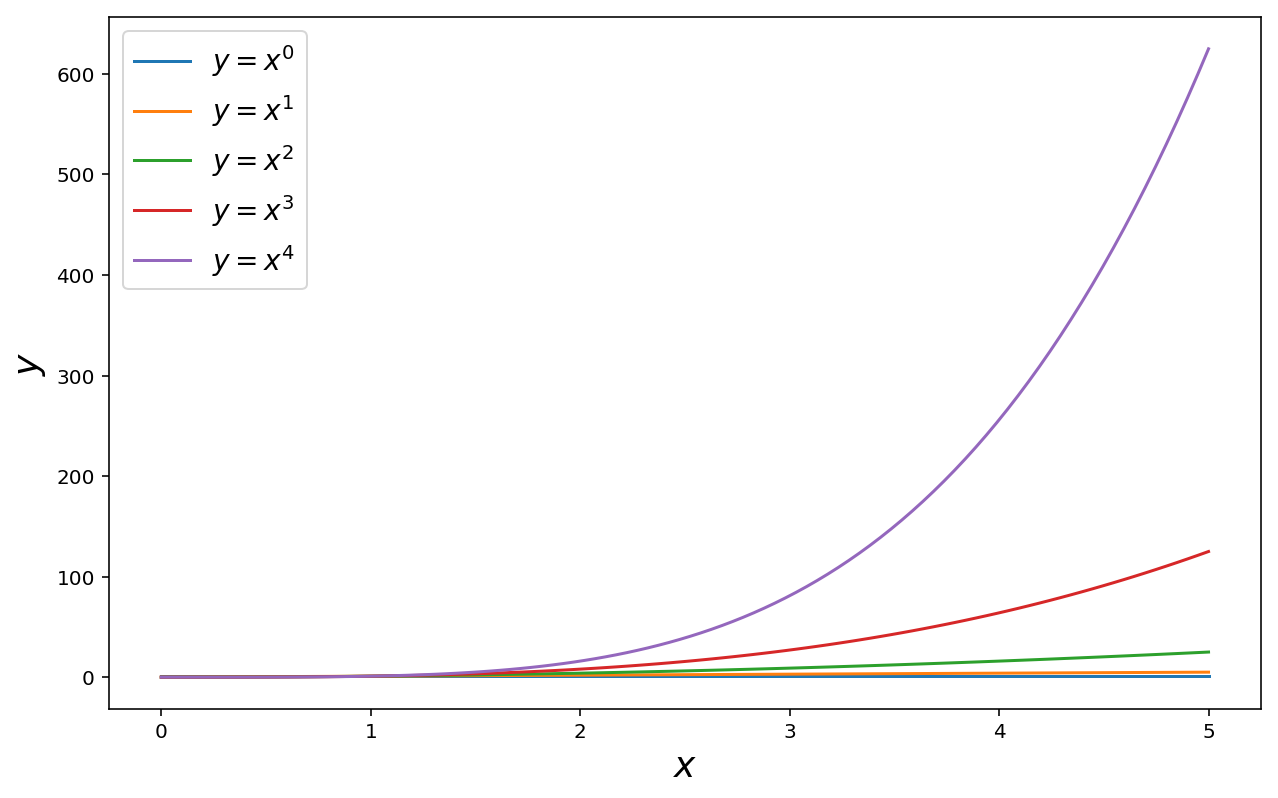

In [15]:
x = np.linspace(0, 5, 100) # a numpy array of 100 linearly spaced x points from 0 to 5

fig = plt.figure(figsize=(10,6)) # Make figure object

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # Place axes

# Plot each function by using a loop
for i in range(0,5):
    axes.plot(x, x**i, label="$y = x^{}$".format(i)) # Notice that I can use variables in my labels, just like with other text strings
axes.legend(loc=2,fontsize=14); # Make legend in upper left corner. Location codes listed at http://matplotlib.org/users/legend_guide.html#legend-location
axes.set_xlabel(r"$x$",fontsize=18)
axes.set_ylabel(r"$y$",fontsize=18)

Awesome! Exactly what we wanted. Now let's see if you can use these skills to plot some thermodynamically-relevant equations.

### A Further Exercise
Solve the following by adding a combination of markdown and code cells after the question. Use the plotting and looping skills that you learned above.

***Question 1:*** Solved for pressure, the ideal gas law says $P=RT/V$ for one mole of gas ($n=1$). Your goal is to make a figure that plots this law for different values of $T$. Your dependent variable $P$ will be on the $y$-axis, and your independent variable $V$  will be on the $x$-axis. On one figure, you will plot six curves: the ideal gas law for values of $T$ from 50 K to 300 K in increments of 50 K. Each of these curves is known as an "isotherm," because they plot values at the same ("iso-") temperature ("-therm"). Before making your plot, describe what you expect these curves to look like and how you know, so that you know if your plot makes sense. Label your axes clearly, and include a legend in which the labels are the temperatures of each curve. Make sure that your $x$ axis covers enough $V$ range to show the shape of the curve clearly. (Hint: use the `range` function with increments of 50 and don't forget the skills you learned in HW1 for importing constants.) Explain in words in a markdown cell what you are seeing. Physically, why do higher-$T$ curves lie above lower-$T$ curves for any given volume? If an adiabatic process moves between isotherms and an isothermal process stays on an isotherm, does it take more work to compress an ideal gas via an adiabat or an isotherm if the two processes start at the same $P,V$ location and are compressed the same amount? How do you know graphically from your plot?